In [ ]:
# Mount Google Drive if using Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    USING_COLAB = True
except:
    USING_COLAB = False

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# !pip install nlpaug

In [3]:
import torch
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
import nlpaug.augmenter.word as naw
import math

c:\Users\saraujo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
if USING_COLAB:
    path_dataset = "/content/drive/My Drive/GTSI/Codigos_proyectos_carrera/data"
    sufix = "colab"
else:
    path_dataset = "./data"
    sufix = "local"

In [4]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv(path_dataset + '/projects.csv')

In [6]:
df.shape

(19422, 6)

In [7]:
df.head()

titulo  \
0  preparaci√≥n de nano celulosa y su utilizaci√≥n ...   
1  monitoreo no intrusivo de cargas el√©ctricas en...   
2  difusi√≥n del uso de herramientas tecnol√≥gicas ...   
3  plan de negocios para la venta de snacks salud...   
4  variacion del tiempo de fraguado debido a mixt...   

                                            FACULTAD  \
0       Facultad de Ciencias Naturales y Matem√°ticas   
1       Facultad de Ciencias Naturales y Matem√°ticas   
2  Facultad de Arte, Dise√±o y Comunicaci√≥n Audiov...   
3       Facultad de Ciencias Sociales y Human√≠sticas   
4    Facultad de Ingenier√≠a en Ciencias de la Tierra   

                                  CARRERA  \
0                      Ingenier√≠a Qu√≠mica   
1                  Logistica y Transporte   
2                          Dise√±o Gr√°fico   
3  Ingenier√≠a en Negocios Internacionales   
4                       Ingenier√≠a  Civil   

                                        NOMBREPROYEC  counts URL  
0  Preparaci√≥n de nano celulosa y su utilizaci√≥n ...    72.0   0  
1  MONITOREO NO INTRUSIVO DE CARGAS EL√âCTRICAS EN...    71.0   0  
2  Difusi√≥n del uso de herramientas tecnol√≥gicas ...    62.0   0  
3  PLAN DE NEGOCIOS PARA LA VENTA DE SNACKS SALUD...    56.0   0  
4  Variacion del tiempo de fraguado debido a mixt...    56.0   0

In [8]:
df["titulo"].nunique(), df["NOMBREPROYEC"].nunique(), df["FACULTAD"].nunique(), df["CARRERA"].nunique()

(18277, 18672, 10, 78)

In [9]:
df_titulo_count_all = df["titulo"].value_counts()
df_titulo_count = df_titulo_count_all[df_titulo_count_all > 1]
df_titulo_count

titulo
dise√±o de un equipo para la medici√≥n de la biodegradabilidad en pel√≠culas polim√©rica y no polim√©ricas                                                                                                                       6
dise√±o estudio caracterizaci√≥n y evaluaci√≥n de la factibilidad de uso de un envase innovador para la industria alimentaria en el mercado ecuatoriano                                                                        6
dise√±o de un sistema de riego automatizado mediante el suministro de energ√≠as no convencionales para la producci√≥n de cabras                                                                                                5
determinaci√≥n de caracter√≠sticas de las playas de valdivia playa rosada y san pedro para apoyar el manejo de la anidaci√≥n de tortugas en el pa√≠s mediante acitividades de turismo responsable                               5
prototipo de control autom√°tico de calidad de comida usando im√°genes hiperespectrales   

In [10]:
df[df["titulo"] == df_titulo_count.keys()[0]]

titulo  \
544   dise√±o de un equipo para la medici√≥n de la bio...   
574   dise√±o de un equipo para la medici√≥n de la bio...   
2141  dise√±o de un equipo para la medici√≥n de la bio...   
2658  dise√±o de un equipo para la medici√≥n de la bio...   
4264  dise√±o de un equipo para la medici√≥n de la bio...   
6248  dise√±o de un equipo para la medici√≥n de la bio...   

                                               FACULTAD  \
544   Facultad de Ingenier√≠a en Mec√°nica y Ciencias ...   
574   Facultad de Ingenier√≠a en Mec√°nica y Ciencias ...   
2141       Facultad de Ciencias Naturales y Matem√°ticas   
2658  Facultad de Ingenier√≠a en Electricidad y Compu...   
4264                    Facultad de Ciencias de la Vida   
6248  Facultad de Ingenier√≠a en Mec√°nica y Ciencias ...   

                           CARRERA  \
544                      Alimentos   
574                       Mec√°nica   
2141            Ingenier√≠a Qu√≠mica   
2658  Electr√≥nica y Automatizaci√≥n   
4264                      Biolog√≠a   
6248           Ingenier√≠a Mec√°nica   

                                           NOMBREPROYEC  counts URL  
544   DISE√ëO DE UN EQUIPO PARA LA MEDICI√ìN DE LA BIO...    24.0   0  
574   Dise√±o de un equipo para la medici√≥n de la bio...    24.0   0  
2141  DISE√ëO DE UN EQUIPO PARA LA MEDICI√ìN DE LA BIO...    16.0   0  
2658  DISE√ëO DE UN EQUIPO PARA LA MEDICI√ìN DE LA BIO...    15.0   0  
4264  DISE√ëO DE UN EQUIPO PARA LA MEDICI√ìN DE LA BIO...    11.0   0  
6248  Dise√±o de un equipo para la medici√≥n de la bio...     2.0   0

In [11]:
df_carrera_count_all = df["CARRERA"].value_counts()
value_counts = 10
df_carrera_count = df_carrera_count_all[df_carrera_count_all >= value_counts]
df_carrera_count_less = df_carrera_count_all[df_carrera_count_all < value_counts]
df_carrera_count_all

CARRERA
Econom√≠a                                                             1523
Electricidad                                                         1371
Ingenier√≠a Industrial                                                1018
Telecomunicaciones                                                    979
Ingenier√≠a Comercial                                                  836
                                                                     ... 
Ingenier√≠a en Auditor√≠a y Control de Gesti√≥n. Calidad de Procesos       5
Diplomado en Evaluaci√≥n y Direcci√≥n de Proyectos de Inversi√≥n           5
Ciencias Biol√≥gicas                                                     3
Licenciatura en Sistema de Informaci√≥n (EDCOM)                          1
Programador de Sistemas                                                 1
Name: count, Length: 78, dtype: int64

In [12]:
df_carrera_count_all.shape, df_carrera_count.shape, df_carrera_count_less.shape

((78,), (71,), (7,))

In [13]:
df_carrera_count_less

CARRERA
Tecnolog√≠a Superior en Logistica Portuaria                           9
Licenciatura en Sistema de Informaci√≥n                               5
Ingenier√≠a en Auditor√≠a y Control de Gesti√≥n. Calidad de Procesos    5
Diplomado en Evaluaci√≥n y Direcci√≥n de Proyectos de Inversi√≥n        5
Ciencias Biol√≥gicas                                                  3
Licenciatura en Sistema de Informaci√≥n (EDCOM)                       1
Programador de Sistemas                                              1
Name: count, dtype: int64

In [14]:
df_carrera_count

CARRERA
Econom√≠a                                                                               1523
Electricidad                                                                           1371
Ingenier√≠a Industrial                                                                  1018
Telecomunicaciones                                                                      979
Ingenier√≠a Comercial                                                                    836
                                                                                       ... 
Ingenier√≠a en Alimentos                                                                  13
Diplomado Superior en Contadur√≠a P√∫blica y Finanzas con aplicaci√≥n a la Inform√°tica      13
Ingenier√≠a en Acuicultura                                                                12
Tecnolog√≠a Superior en Mecatr√≥nica                                                       11
Ingenier√≠a Oce√°nica y Ciencias Ambientales                 

In [15]:
df_new = df[df["CARRERA"].isin(df_carrera_count.index)]
df_new.shape

(19393, 6)

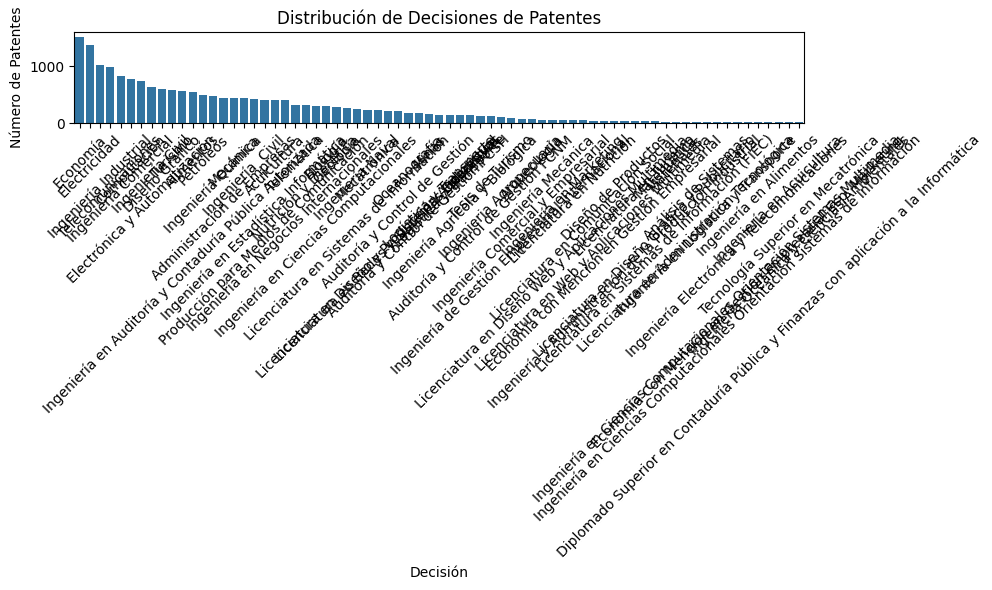

In [16]:
# diagrama de barras de la columna "decision"
plt.figure(figsize=(10, 6))
sns.countplot(data=df_new, x='CARRERA', order=df_new['CARRERA'].value_counts().index)
plt.title('Distribuci√≥n de Decisiones de Patentes')
plt.xlabel('Decisi√≥n')
plt.ylabel('N√∫mero de Patentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## DataAugmentation

In [ ]:
def balance_with_multi_gpu_parallel(df, text_col='titulo', label_col='CARRERA', gpu_ids=[0, 1], target_count=None):
    """Balancea dataset usando m√∫ltiples GPUs con paralelizaci√≥n intra-clase"""
    # Verificar GPUs disponibles
    available_gpus = torch.cuda.device_count() if torch.cuda.is_available() else 0
    print(f"GPUs disponibles: {available_gpus}")

    if available_gpus == 0:
        print("‚ö†Ô∏è No hay GPUs disponibles, usando CPU")
        gpu_ids = ['cpu']
    elif available_gpus < len(gpu_ids):
        print(f"‚ö†Ô∏è Solo {available_gpus} GPUs disponibles, usando las primeras {available_gpus}")
        gpu_ids = gpu_ids[:available_gpus]

    # Crear augmenters para cada GPU
    augmenters = {}
    for gpu_id in gpu_ids:
        device = f'cuda:{gpu_id}' if gpu_id != 'cpu' else 'cpu'
        augmenters[gpu_id] = naw.ContextualWordEmbsAug(
            model_path='bert-base-multilingual-uncased',
            aug_p=0.1,
            device=device
        )
        print(f"‚úÖ Augmenter creado en {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}")

    # An√°lisis de clases
    class_counts = df[label_col].value_counts()
    # --------------------------------------------------
    if target_count is None:
        target_count = class_counts.max()
        print(f"üîç No se especific√≥ target_count, ahora se usar√† el m√°ximo de clases: {target_count:,}")
    # --------------------------------------------------


    print(f"\nDistribuci√≥n actual:")
    for class_label, count in class_counts.items():
        print(f"  {class_label}: {count:,}")
    print(f"\nObjetivo: {target_count:,} muestras por clase")

    def process_batch_on_gpu(args):
        """Procesa un lote de una clase en una GPU espec√≠fica"""
        class_label, batch_start, batch_size, class_texts, gpu_id, total_needed = args

        augmenter = augmenters[gpu_id]
        augmented_data = []

        batch_end = min(batch_start + batch_size, total_needed)
        actual_batch_size = batch_end - batch_start
        print("actual_batch_size", actual_batch_size, "batch_end", batch_end, "batch_start", batch_start)

        print(f"üöÄ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Procesando clase {class_label} "
              f"[{batch_start:,}-{batch_end:,}] ({actual_batch_size:,} muestras)")

            
        # Procesar en mini-batches
        mini_batch_size = 16
        for i in range(0, actual_batch_size, mini_batch_size):
            mini_end = min(i + mini_batch_size, actual_batch_size)
            print("desde", i, "hasta", mini_end, "mini_batch_size", mini_batch_size, "actual_batch_size", actual_batch_size)
            mini_texts = [class_texts[j % len(class_texts)] for j in range(i, mini_end)]
            print(f"  Procesando mini-batch {i // mini_batch_size + 1}, i {i}, mini_end {mini_end}, mini_texts {len(mini_texts)}")

            try:
                augmented_batch = augmenter.augment(mini_texts, 
                                                    n=math.ceil((batch_end - i) / len(class_texts)),
                                                    num_thread=1 if gpu_id == 'cpu' else 4)

                for j, aug_text in enumerate(augmented_batch):
                    # Mantener las columnas originales del dataframe
                    original_idx = (i + j) % len(class_texts)
                    original_row = df[df[label_col] == class_label].iloc[original_idx]

                    global_idx = batch_start + i + j
                    augmented_data.append({
                        'FACULTAD': original_row['FACULTAD'],
                        'NOMBREPROYEC': original_row['NOMBREPROYEC'],
                        text_col: aug_text,
                        label_col: class_label,
                        'gpu_used': gpu_id,
                        'batch_id': f"{class_label}_GPU{gpu_id}_{batch_start}-{batch_end}"
                    })

            except Exception as e:
                print(f"Error en {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: {e}")
                # Fallback
                for j, text in enumerate(mini_texts):
                    original_idx = (i + j) % len(class_texts)
                    original_row = df[df[label_col] == class_label].iloc[original_idx]

                    global_idx = batch_start + i + j
                    augmented_data.append({
                        'FACULTAD': original_row['FACULTAD'],
                        'NOMBREPROYEC': original_row['NOMBREPROYEC'],
                        text_col: text,
                        label_col: class_label,
                        'gpu_used': gpu_id,
                        'batch_id': f"{class_label}_GPU{gpu_id}_{batch_start}-{batch_end}"
                    })
            finally:
                print(f"‚úÖ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Completado lote {class_label} batch {i // batch_size + 1} ({len(augmented_data):,} muestras), i {i})")

        print(f"‚úÖ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Completado lote {class_label} "
              f"[{batch_start:,}-{batch_end:,}] - {len(augmented_data)} muestras generadas")
        return augmented_data

    # Preparar trabajos dividiendo cada clase entre GPUs
    all_jobs = []

    for class_label, current_count in class_counts.items():
        needed = target_count - current_count
        
        if needed <= 0:
            print(f"Clase {class_label} ya tiene suficientes muestras ({current_count:,})")
            continue

        print("needed", needed, "needed menos", 5000, "target_count", target_count, "current_count", current_count)
        # needed = 5000
        
        class_texts = df[df[label_col] == class_label][text_col].tolist()
        class_texts.reverse()

        num_batches = 8  # O el n√∫mero de hilos que quieras
        batch_size = math.ceil(needed / num_batches)
        for i in range(num_batches):
            batch_start = i * batch_size
            if batch_start >= needed:
                break
            this_batch_size = min(batch_size, needed - batch_start)
            print(f"Clase {class_label}: Lote {i + 1}/{num_batches} - "
                  f"Desde {batch_start} hasta {batch_start + this_batch_size} ({this_batch_size} muestras) - tama√±o de class_texts los {label_col} = {len(class_texts)}")
            all_jobs.append((class_label, batch_start, this_batch_size, class_texts, gpu_ids[0], needed))


    if not all_jobs:
        print("‚úÖ El dataset ya est√° balanceado")
        return df

    print(f"\nüî• Total de trabajos paralelos: {len(all_jobs)}")

    # Ejecutar todos los trabajos en paralelo
    all_augmented_data = []
    max_workers = min(len(all_jobs), len(gpu_ids) * 2)  # Limitar workers
    # max_workers = len(all_jobs)
    print("max_workers", max_workers, len(all_jobs), len(gpu_ids))

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        results = executor.map(process_batch_on_gpu, all_jobs)

        for result in results:
            all_augmented_data.extend(result)

    # Combinar resultados
    if all_augmented_data:
        augmented_df = pd.DataFrame(all_augmented_data)
        balanced_df = pd.concat([df, augmented_df], ignore_index=True)
    else:
        balanced_df = df.copy()

    print(f"\nüéâ Completado!")
    print(f"Total original: {len(df):,}")
    print(f"Total final: {len(balanced_df):,}")
    print(f"Muestras a√±adidas: {len(all_augmented_data):,}")

    # Mostrar distribuci√≥n final
    final_counts = balanced_df[label_col].value_counts()
    print(f"\nDistribuci√≥n final:")
    for class_label, count in final_counts.items():
        print(f"  {class_label}: {count:,}")

    # Mostrar uso detallado por GPU
    if len(all_augmented_data) > 0:
        augmented_df_temp = pd.DataFrame(all_augmented_data)

        print("\nüìä Uso detallado por GPU:")
        gpu_usage = augmented_df_temp.groupby(['gpu_used', label_col]).size().reset_index(name='count')

        for gpu_id in gpu_ids:
            gpu_data = gpu_usage[gpu_usage['gpu_used'] == gpu_id]
            total_gpu = gpu_data['count'].sum()
            print(f"\n  {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: {total_gpu:,} muestras totales")

            for _, row in gpu_data.iterrows():
                print(f"    - {row[label_col]}: {row['count']:,}")

    return balanced_df

In [ ]:
balanced_df = balance_with_multi_gpu_parallel(df, gpu_ids=[0], target_count=5000)

GPUs disponibles: 0
‚ö†Ô∏è No hay GPUs disponibles, usando CPU


The following layers were not sharded: cls.predictions.transform.LayerNorm.weight, bert.encoder.layer.*.attention.self.value.weight, cls.predictions.decoder.bias, bert.embeddings.LayerNorm.weight, bert.embeddings.position_embeddings.weight, bert.encoder.layer.*.output.LayerNorm.bias, bert.encoder.layer.*.output.dense.weight, bert.encoder.layer.*.attention.self.query.bias, bert.encoder.layer.*.attention.output.LayerNorm.bias, bert.encoder.layer.*.attention.output.dense.bias, cls.predictions.bias, cls.predictions.decoder.weight, bert.embeddings.LayerNorm.bias, bert.encoder.layer.*.intermediate.dense.weight, bert.encoder.layer.*.attention.self.query.weight, bert.encoder.layer.*.output.LayerNorm.weight, bert.encoder.layer.*.attention.output.LayerNorm.weight, bert.encoder.layer.*.attention.output.dense.weight, bert.encoder.layer.*.intermediate.dense.bias, bert.embeddings.word_embeddings.weight, bert.encoder.layer.*.attention.self.key.bias, bert.encoder.layer.*.attention.self.value.bias, cls

‚úÖ Augmenter creado en CPU cpu

Distribuci√≥n actual:
  Econom√≠a: 1,523
  Electricidad: 1,371
  Ingenier√≠a Industrial: 1,018
  Telecomunicaciones: 979
  Ingenier√≠a Comercial: 836
  Computaci√≥n: 772
  Electr√≥nica y Automatizaci√≥n: 739
  Ingenier√≠a Civil: 638
  Dise√±o Gr√°fico: 600
  Turismo: 577
  Ingenier√≠a en Auditor√≠a y Contadur√≠a P√∫blica Autorizada: 565
  Alimentos: 550
  Petr√≥leos: 497
  Ingenier√≠a Qu√≠mica: 468
  Administraci√≥n de Empresas: 449
  Mec√°nica: 448
  Ingenier√≠a  Civil: 435
  Ingenier√≠a en Estad√≠stica Inform√°tica: 420
  Producci√≥n para Medios de Comunicaci√≥n: 412
  Acuicultura: 410
  Ingenier√≠a en Negocios Internacionales: 407
  Telem√°tica: 316
  Nutrici√≥n y Diet√©tica: 310
  Ingenier√≠a en Ciencias Computacionales: 298
  Biolog√≠a: 294
  Geolog√≠a: 279
  Licenciatura en Sistemas de Informaci√≥n: 272
  Ingenier√≠a Naval: 255
  Mecatr√≥nica: 233
  Licenciatura en Dise√±o y Producci√≥n Audiovisual: 229
  Licenciatura en Redes y Sistemas Operativo

In [ ]:
balanced_df.to_csv(path_dataset + "/projects_augmented_" + sufix + ".csv", index=False)